# AIRBNB SEATTLE
This is an explanatory journey of the data provided by Airbnb seattle.

# Questions I Believe worth Exploring

1. What are the most important features that affect the host revenue?
2.  Is it a winner takes all, in other words are the top listings harvesting more than 1/3 of the total revenue?
3. How much do the hosts make and whom are the top earners? and is it a side business or a full time job?
4. How do the top earning listings compare to the worst earning listings in terms of features?
5. What are the most popular and most expensive neighborhoods in Seattle?

## Importing the needed libraries

In [2]:
# Import the needed libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import feature_extraction
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from pandas.api.types import is_string_dtype, is_numeric_dtype
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import math
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
import re
from sklearn.preprocessing import StandardScaler

## Importing Data

In [8]:
# Import the required dataset
# seattle_cal = pd.read_csv('Data/AirBnB/seattle/calendar.csv')
# seattle_list = pd.read_csv('Data/AirBnB/seattle/listings.csv')
# seattle_rev = pd.read_csv('Data/AirBnB/seattle/reviews.csv')


seattle_cal = pd.read_csv('/Users/wafic/Downloads/seattle/calendar.csv')
seattle_list = pd.read_csv('/Users/wafic/Downloads/seattle/listings.csv')
seattle_rev = pd.read_csv('/Users/wafic/Downloads/seattle/reviews.csv')

In [9]:
# This function enables the me to see all the columns in the dataframe
def display_all(df):
    with pd.option_context('display.max_rows', 1000, 'display.max_columns', 1000):
        display(df)

In [10]:
display_all(seattle_list.head())

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [11]:
# There are 92 variables in the listing dataset with 3818 observations 
seattle_list.shape

(3818, 92)

In [12]:
seattle_list.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

Looking at the listing file, we see 92 variables with 3,818 records

In [13]:
df_raw = seattle_list.copy()

## Data Cleansing

In [14]:
def remove_symbols(df, col):
    df[col] = df[col].str.replace('$', '')
    df[col] = df[col].str.replace(',', '').astype(float)
    df[col].fillna(0, inplace=True)

In [15]:
def remove_perc(df, col):
    df[col] = df[col].str.replace('%', '').astype(float)
    df[col].fillna(0, inplace=True)

In [16]:
def clean_row(df):
    # Convert the values with "$" to  and fill nulls with zero as this shall be free of charge or not available
    remove_symbols(df, 'price')
    remove_symbols(df, 'extra_people')
    remove_symbols(df, 'security_deposit')
    remove_symbols(df, 'cleaning_fee')
    remove_perc(df, 'host_acceptance_rate')
    remove_perc(df, 'host_response_rate')
    remove_symbols(df, 'monthly_price')
    remove_symbols(df, 'weekly_price')

In [17]:
clean_row(df_raw)

In [18]:
df_raw.shape

(3818, 92)

In [19]:
def clean_col(df):
    # Check for columns with same value in every record
    empty_cols = []
    for col in df.columns:
        if np.all(df.groupby(col).id.count() == 3818):
            empty_cols.append(col)
    df.drop(empty_cols, axis=1, inplace=True)
    
    # Drop variables with URL as these are unique to each record and holds little value
    col_url = df.columns[df.columns.str.contains('_url')]
    df.drop(col_url, axis=1, inplace=True)


In [20]:
clean_col(df_raw)

In [21]:
df_raw.shape

(3818, 73)

In [22]:
# This finction will encode columns to check if any has the same value but in different form
def drop_duplicates(df):
    factor_df =  pd.DataFrame()

    for col in df.columns:
        factor_df[col] = df[col].factorize()[0]
        
    dupl_dict = {}
    for index, col_1 in enumerate(factor_df.columns):
        for col_2 in factor_df.columns[index + 1:]:
            if np.all(factor_df[col_1] == factor_df[col_2]):
                dupl_dict[col_1] = col_2
    return dupl_dict

In [23]:
drop_duplicates(df_raw)

{'id': 'longitude',
 'host_listings_count': 'host_total_listings_count',
 'city': 'smart_location',
 'latitude': 'longitude'}

Columns city and host_listings_count can be dropped easily as they are duplicates

In [24]:
df_raw.drop(['host_listings_count', 'city'], axis=1, inplace=True)

In [25]:
display_all(df_raw.head())

,id,name,summary,space,description,neighborhood_overview,notes,transit,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,state,zipcode,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,NaN,NaN,NaN,956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96.0,100.0,f,Queen Anne,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,WA,98119,"Seattle, WA",47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,85.0,0.0,0.0,0.0,0.0,2,5.0,1,365,4 weeks ago,14,41,71,346,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2,4.07
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98.0,100.0,t,Queen Anne,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,WA,98119,"Seattle, WA",47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,150.0,1000.0,3000.0,100.0,40.0,1,0.0,2,90,today,13,13,16,291,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,t,t,6,1.48
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,16708587,Jill,2014-06-12,"Seattle, Washington, United States",i love living in Seattle. i grew up in the mi...,within a few hours,67.0,100.0,f,Queen Anne,2.0,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,"West Lee Street, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,WA,98119,"Seattle, WA",47.629724,-122.369483,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,975.0,0.0,0.0,1000.0,300.0,10,25.0,4,30,5 weeks ago,1,6,17,220,20,2014-07-30,2015-09-03,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,f,f,2,1.15
3,7421966,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,NaN,NaN,NaN,9851441,Emily,2013-11-06,"Seattle, Washington, United States",NaN,NaN,0.0,0.0,f,Queen Anne,1.0,"['email', 'phone', 'facebook'

In [26]:
df_raw.isnull().sum().sort_values(ascending=False)[:20]

square_feet                    3721
notes                          1606
neighborhood_overview          1032
transit                         934
host_about                      859
review_scores_checkin           658
review_scores_accuracy          658
review_scores_value             656
review_scores_location          655
review_scores_cleanliness       653
review_scores_communication     651
review_scores_rating            647
first_review                    627
reviews_per_month               627
last_review                     627
space                           569
host_response_time              523
neighbourhood                   416
host_neighbourhood              300
summary                         177
dtype: int64

In [27]:
df_raw.columns

Index(['id', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'host_id', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'state', 'zipcode', 'smart_location',
       'latitude', 'longitude', 'is_location_exact', 'property_type',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price',
       'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'calendar_updated',
       'availability_30', 'availability_60', 'availability_90',
       'avail

In [28]:
df_raw.property_type.value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Bungalow             13
Camper/RV            13
Boat                  8
Tent                  5
Treehouse             3
Dorm                  2
Chalet                2
Yurt                  1
Name: property_type, dtype: int64

In [29]:
df_raw.room_type.value_counts()

Entire home/apt    2541
Private room       1160
Shared room         117
Name: room_type, dtype: int64

In [30]:
df_raw.availability_365.sort_values(ascending=False).head(10)

1446    365
1995    365
1194    365
1188    365
3053    365
1187    365
3051    365
1186    365
3048    365
1991    365
Name: availability_365, dtype: int64

In [31]:
df_raw.availability_365.sort_values(ascending=False).tail(10)

2961    0
1800    0
1857    0
2955    0
2935    0
2929    0
1955    0
1980    0
2852    0
384     0
Name: availability_365, dtype: int64

It is really stange that some properties are not available at all, why listed?

In [32]:
display_all(df_raw[df_raw.availability_365 == 0].head())

,id,name,summary,space,description,neighborhood_overview,notes,transit,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,state,zipcode,smart_location,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,availability_30,availability_60,availability_90,availability_365,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
142,4550099,Brand-New 3BR/3BA Home w/ Roof-View,Brand-new 3BR/3BA townhome in the Ballard neig...,"Brand-new, 3-story, 3BR/3BA townhome with mode...",Brand-new 3BR/3BA townhome in the Ballard neig...,Located two blocks from a 15 minute Rapid Ride...,NaN,The Rapid Ride D-line picks up two blocks from...,15104715,Mike & Laura,2014-05-04,"Seattle, Washington, United States",We are newlyweds who moved from California to ...,NaN,0.0,0.0,f,Ballard,1.0,"['email', 'phone', 'facebook', 'google', 'link...",t,t,"Northwest 62nd Street, Seattle, WA 98107, Unit...",Ballard,West Woodland,Ballard,WA,98107,"Seattle, WA",47.674333,-122.375678,t,House,Entire home/apt,6,3.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,295.0,0.0,0.0,300.0,131.0,5,50.0,2,7,3 months ago,0,0,0,0,3,2014-11-29,2015-05-26,93.0,9.0,7.0,9.0,10.0,9.0,8.0,f,strict,f,f,1,0.22
297,1030411,Classic Seattle/Wallingford Home,Fantastic location! Bright and open remodeled ...,Our classic craftsman home is in the Wallingfo...,Fantastic location! Bright and open remodeled ...,"Wallingford is a central, walkable neighborhoo...",We have two friendly cats who live in the hous...,There are several bus lines within a few block...,365852,Kymber,2011-01-28,"Seattle, Washington, United States",Jay is a linguist and program manager at Micro...,NaN,0.0,0.0,f,Wallingford,1.0,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,"North 49th Street, Seattle, WA 98103, United S...",Wallingford,Wallingford,Other neighborhoods,WA,98103,"Seattle, WA",47.665402,-122.339387,t,House,Entire home/apt,4,2.0,2.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Free Pa...",2100.0,200.0,0.0,0.0,0.0,100.0,1,0.0,3,14,6 months ago,0,0,0,0,3,2014-06-22,2014-12-28,100.0,10.0,10.0,9.0,10.0,10.0,10.0,f,strict,f,f,1,0.16
324,4122325,Spacious 3bd/2ba Green Lake Home,Our comfortable and stylish home is a short wa...,Our home has an open floor plan on the main fl...,Our comfortable and stylish home is a short wa...,Green Lake is a beautiful neighborhood in the ...,We do have a big friendly dog. She travels wit...,"Easy access to Wallingford, Fremont, Ballard, ...",17961308,Ryan,2014-07-11,"Seattle, Washington, United States",My wife and I live in the Green Lake neighborh...,within a few hours,100.0,100.0,t,Green Lake,1.0,"['email', 'phone', 'linkedin', 'reviews', 'jum...",t,t,"5th Avenue Northeast, Seattle, WA 98115, Unite...",Green Lake,Wallingford,Other neighborhoods,WA,98115,"Seattle, WA",47.672062,-122.324928,t,House,Entire home/apt,5,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",NaN,175.0,0.0,0.0,100.0,0.0,5,0.0,2,14,5 weeks ago,0,0,0,0,26,2014-10-26,2015-11-15,99.0,10.0,10.0,10.0,10.0,10.0,10.0,f,moderate,f,f,1,1.79
368,6765045,Charming 3BR home in Wallingford,Ground floor unit in historic craftsman duplex...,Ground floor unit in historic craftsman house ...,Ground 

In [33]:
df_raw.amenities.unique()

array(['{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,Heating,"Family/Kid Friendly",Washer,Dryer}',
       '{TV,Internet,"Wireless Internet",Kitchen,"Free Parking on Premises","Buzzer/Wireless Intercom",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector","First Aid Kit","Safety Card","Fire Extinguisher",Essentials}',
       '{TV,"Cable TV",Internet,"Wireless Internet","Air Conditioning",Kitchen,"Free Parking on Premises","Pets Allowed","Pets live on this property",Dog(s),Cat(s),"Hot Tub","Indoor Fireplace",Heating,"Family/Kid Friendly",Washer,Dryer,"Smoke Detector","Carbon Monoxide Detector",Essentials,Shampoo}',
       ...,
       '{"Cable TV","Wireless Internet",Kitchen,"Free Parking on Premises",Breakfast,"Pets live on this property",Dog(s),Cat(s),Heating,Washer,Dryer,"Smoke Detector","First Aid Kit","Safety Card","Fire Extinguisher",Essentials,Hangers,"Hair Dryer",Iron,"Laptop Friendly Workspace"}',
       '{TV,"Wireless I

In [34]:
df_pred = df_raw[['id', 'host_name', 'host_response_time', 'host_acceptance_rate','host_response_rate',
                  'host_is_superhost', 'host_verifications','host_has_profile_pic', 'host_identity_verified', 
                  'neighbourhood_cleansed', 
                  'is_location_exact', 'property_type', 'room_type', 'accommodates',
                  'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price',
                  'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
                  'minimum_nights','availability_365', 'number_of_reviews', 'review_scores_rating',
                  'review_scores_accuracy', 'review_scores_cleanliness',
                  'review_scores_checkin', 'review_scores_communication',
                  'review_scores_location', 'review_scores_value', 'instant_bookable',
                  'cancellation_policy', 'require_guest_profile_picture', 'calculated_host_listings_count', 
                  'reviews_per_month']].copy()

# Feature Engineering

In [35]:
def host_name(df):
    # Treating host name
    # The host name doesnt look a lot but upon checking them I noticed that there are singles and couples 
    # hosts which makes it interesting to see if such a variable affects a person decisions
    pattern = '&|And '
    conditions = [(df.host_name.str.contains(pattern) == True), (df.host_name.str.contains(pattern) == False)]
    choices = ['Couple', 'Singles']
    df['host_type'] = np.select(conditions, choices)
    df.drop(['host_name'], axis=1, inplace=True)

In [36]:
host_name(df_pred)

In [37]:
display_all(df_pred.head())

,id,host_response_time,host_acceptance_rate,host_response_rate,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,calculated_host_listings_count,reviews_per_month,host_type
0,241032,within a few hours,100.0,96.0,f,"['email', 'phone', 'reviews', 'kba']",t,t,West Queen Anne,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,0.0,0.0,2,5.0,1,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,2,4.07,Singles
1,953595,within an hour,100.0,98.0,t,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,West Queen Anne,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.0,100.0,40.0,1,0.0,2,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,t,6,1.48,Singles
2,3308979,within a few hours,100.0,67.0,f,"['email', 'phone', 'google', 'reviews', 'jumio']",t,t,West Queen Anne,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",975.0,1000.0,300.0,10,25.0,4,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,f,2,1.15,Singles
3,7421966,NaN,0.0,0.0,f,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,West Queen Anne,t,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",100.0,0.0,0.0,1,0.0,1,143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,f,1,NaN,Singles
4,278830,within an hour,0.0,100.0,f,"['email', 'phone', 'facebook', 'reviews', 'kba']",t,t,West Queen Anne,t,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",450.0,700.0,125.0,6,15.0,1,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,f,strict,f,1,0.89,Singles


In [38]:
def host_verify(df):
    # Extracting variables from Host Verfication
    # I decided to create dummy variables from host verifications because keeping them in lists will 
    #dillute the value of each communiction channel
    vectorizer = CountVectorizer()
    tk_count = vectorizer.fit_transform(df['host_verifications'])
    contact_list = vectorizer.get_feature_names()
    
    contact_df = pd.DataFrame(tk_count.toarray(), columns=vectorizer.get_feature_names())
    
    for col in contact_df:
        df[col+'_WC_'+ str(col)] = contact_df[col]
        
    # Drop the existing variable      
    df.drop('host_verifications', axis=1, inplace=True)

In [39]:
host_verify(df_pred)

In [40]:
display_all(df_pred.head())

,id,host_response_time,host_acceptance_rate,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,calculated_host_listings_count,reviews_per_month,host_type,amex_WC_amex,email_WC_email,facebook_WC_facebook,google_WC_google,jumio_WC_jumio,kba_WC_kba,linkedin_WC_linkedin,manual_offline_WC_manual_offline,manual_online_WC_manual_online,none_WC_none,phone_WC_phone,photographer_WC_photographer,reviews_WC_reviews,sent_id_WC_sent_id,weibo_WC_weibo
0,241032,within a few hours,100.0,96.0,f,t,t,West Queen Anne,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",85.0,0.0,0.0,2,5.0,1,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,2,4.07,Singles,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0
1,953595,within an hour,100.0,98.0,t,t,t,West Queen Anne,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",150.0,100.0,40.0,1,0.0,2,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,t,6,1.48,Singles,0,1,1,0,1,0,1,0,0,0,1,0,1,0,0
2,3308979,within a few hours,100.0,67.0,f,t,t,West Queen Anne,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",975.0,1000.0,300.0,10,25.0,4,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,f,2,1.15,Singles,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0
3,7421966,NaN,0.0,0.0,f,t,t,West Queen Anne,t,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,""Indoor ...",100.0,0.0,0.0,1,0.0,1,143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,f,1,NaN,Singles,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0
4,278830,within an hour,0.0,100.0,f,t,t,West Queen Anne,t,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",450.0,700.0,125.0,6,15.0,1,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,f,strict,f,1,0.89,Singles,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0


In [41]:
df_pred.amenities[:10]

0    {TV,"Cable TV",Internet,"Wireless Internet","A...
1    {TV,Internet,"Wireless Internet",Kitchen,"Free...
2    {TV,"Cable TV",Internet,"Wireless Internet","A...
3    {Internet,"Wireless Internet",Kitchen,"Indoor ...
4    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
5    {"Wireless Internet","Free Parking on Premises...
6    {"Wireless Internet","Free Parking on Premises...
7    {"Wireless Internet","Pets live on this proper...
8    {TV,"Cable TV",Internet,"Wireless Internet",Ki...
9    {TV,Internet,"Wireless Internet",Kitchen,"Free...
Name: amenities, dtype: object

In [42]:
amenities_list = []
for index, row in df_pred.iterrows():
    amenities = re.sub('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]', ' ', row['amenities']).strip()
    amenities_list.append(amenities)
df_pred['amenities'] = amenities_list    

In [43]:
df_pred['amenities'].head(10)

0    TV  Cable TV  Internet  Wireless Internet   Ai...
1    TV Internet  Wireless Internet  Kitchen  Free ...
2    TV  Cable TV  Internet  Wireless Internet   Ai...
3    Internet  Wireless Internet  Kitchen  Indoor F...
4    TV  Cable TV  Internet  Wireless Internet  Kit...
5    Wireless Internet   Free Parking on Premises  ...
6    Wireless Internet   Free Parking on Premises  ...
7    Wireless Internet   Pets live on this property...
8    TV  Cable TV  Internet  Wireless Internet  Kit...
9    TV Internet  Wireless Internet  Kitchen  Free ...
Name: amenities, dtype: object

In [44]:
vectorizer = CountVectorizer(ngram_range=(1,5),max_features=250) 
amenities_features = vectorizer.fit_transform(df_pred['amenities'])
amenities_df = pd.DataFrame(amenities_features.toarray(), columns=vectorizer.get_feature_names())

In [45]:
vectorizer.get_feature_names()

['24',
 '24 hour',
 '24 hour check',
 '24 hour check in',
 '24 hour check in hangers',
 'aid',
 'aid kit',
 'aid kit fire',
 'aid kit fire extinguisher',
 'aid kit fire extinguisher essentials',
 'aid kit safety',
 'aid kit safety card',
 'aid kit safety card fire',
 'air',
 'air conditioning',
 'allowed',
 'building',
 'buzzer',
 'buzzer wireless',
 'buzzer wireless intercom',
 'buzzer wireless intercom heating',
 'cable',
 'cable tv',
 'cable tv internet',
 'cable tv internet wireless',
 'cable tv internet wireless internet',
 'carbon',
 'carbon monoxide',
 'carbon monoxide detector',
 'carbon monoxide detector fire',
 'carbon monoxide detector fire extinguisher',
 'carbon monoxide detector first',
 'carbon monoxide detector first aid',
 'card',
 'card fire',
 'card fire extinguisher',
 'card fire extinguisher essentials',
 'card fire extinguisher essentials shampoo',
 'check',
 'check in',
 'check in hangers',
 'conditioning',
 'detector',
 'detector carbon',
 'detector carbon monox

In [46]:
amenities_df_1 = amenities_df[['cable tv', 'carbon monoxide detector', 'elevator in building', 'family kid friendly',
                               'heating', 'indoor fireplace', 'pets live on this property', 'wireless internet', 
                               'internet', '24 hour check in', 'air conditioning', 'hair dryer', 'intercom', 'essentials', 
                               'fire extinguisher', 'safety card', 'laptop friendly workspace', 'kitchen', 'shampoo']]

In [47]:
len(df_pred), len(amenities_df_1)

(3818, 3818)

In [48]:
df = pd.concat([df_pred, amenities_df_1], axis=1)

In [49]:
df.drop('amenities', axis=1, inplace=True)

In [50]:
display_all(df.head())

,id,host_response_time,host_acceptance_rate,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,calculated_host_listings_count,reviews_per_month,host_type,amex_WC_amex,email_WC_email,facebook_WC_facebook,google_WC_google,jumio_WC_jumio,kba_WC_kba,linkedin_WC_linkedin,manual_offline_WC_manual_offline,manual_online_WC_manual_online,none_WC_none,phone_WC_phone,photographer_WC_photographer,reviews_WC_reviews,sent_id_WC_sent_id,weibo_WC_weibo,cable tv,carbon monoxide detector,elevator in building,family kid friendly,heating,indoor fireplace,pets live on this property,wireless internet,internet,24 hour check in,air conditioning,hair dryer,intercom,essentials,fire extinguisher,safety card,laptop friendly workspace,kitchen,shampoo
0,241032,within a few hours,100.0,96.0,f,t,t,West Queen Anne,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,85.0,0.0,0.0,2,5.0,1,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,2,4.07,Singles,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,1,2,0,1,0,0,0,0,0,0,1,0
1,953595,within an hour,100.0,98.0,t,t,t,West Queen Anne,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,150.0,100.0,40.0,1,0.0,2,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,t,6,1.48,Singles,0,1,1,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,1,2,0,0,0,1,1,1,1,0,1,0
2,3308979,within a few hours,100.0,67.0,f,t,t,West Queen Anne,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,975.0,1000.0,300.0,10,25.0,4,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,f,2,1.15,Singles,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,1,1,0,1,1,1,1,1,2,0,1,0,0,1,0,0,0,1,1
3,7421966,NaN,0.0,0.0,f,t,t,West Queen Anne,t,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,100.0,0.0,0.0,1,0.0,1,143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,f,1,NaN,Singles,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,1,1,0,1,2,0,0,0,0,1,1,1,0,1,1
4,278830,within an hour,0.0,100.0,f,t,t,West Queen Anne,t,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,450.0,700.0,125.0,6,15.0,1,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,f,strict,f,1,0.89,Singles,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,1,1,0,0,1,2,0,0,0,0,1,1,0,0,1,1


In [51]:
df.shape

(3818, 71)

## Looking for a Target Variable

The closest is price, but it can't be a clear target variables because the listings we are comapring here are not the same especially in number of people it can accommodate at once

In [52]:
df.room_type.value_counts()

Entire home/apt    2541
Private room       1160
Shared room         117
Name: room_type, dtype: int64

In [53]:
df.groupby('room_type').price.mean()

room_type
Entire home/apt    155.843369
Private room        75.044828
Shared room         47.547009
Name: price, dtype: float64

As visible, average price varies a lot between the different types of listings

I will assume that every review is a booking and it makes sense to include the minimum number of nights per review and multiply them by the price per note

In [54]:
def target_var(df, seattle_rev):
    # Get the reviews from year 2015 as it it is the latest data available
    seattle_rev.date = pd.to_datetime(seattle_rev.date)
    seattle_rev_2015 = seattle_rev[(seattle_rev.date >= '2015-1-1') & (seattle_rev.date < '2016-1-1')]
    
    # Groupby reviews to aggregate the reviews by listing ID
    seattle_rev_2015_df = seattle_rev_2015.groupby('listing_id').reviewer_id.count().to_frame().reset_index()
    seattle_rev_2015_df.rename(columns={'listing_id':'id', 'reviewer_id':'Number_of_Reviews_2015'}, inplace=True)
    
    # Merge with the mother df
    df = df.merge(seattle_rev_2015_df, on='id', how='left')
    df.Number_of_Reviews_2015.fillna(0, inplace=True)
    
    # Create the new target variable revenue by multiplying the price with the minimium nights per review and the number of reviews for this listing in 2015
    df['Revenue_2015'] = df.price * df.minimum_nights * df.Number_of_Reviews_2015
    
    return df

In [55]:
df = target_var(df, seattle_rev)

In [56]:
round(df['Revenue_2015'].describe(), 2)

count      3818.00
mean       3228.71
std       14534.56
min           0.00
25%         195.00
50%        1188.00
75%        3638.50
max      750000.00
Name: Revenue_2015, dtype: float64

We have a listing that generated 750,000 USD which is a probably wrong

In [57]:
df.minimum_nights.describe()

count    3818.000000
mean        2.369303
std        16.305902
min         1.000000
25%         1.000000
50%         2.000000
75%         2.000000
max      1000.000000
Name: minimum_nights, dtype: float64

We have a listing with minimum nights more than 1,000 which is definitly an error

In [58]:
df[df.minimum_nights >365]

,id,host_response_time,host_acceptance_rate,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,is_location_exact,property_type,...,hair dryer,intercom,essentials,fire extinguisher,safety card,laptop friendly workspace,kitchen,shampoo,Number_of_Reviews_2015,Revenue_2015
2617,3594885,within a few hours,100.0,100.0,f,t,f,Broadway,t,Apartment,...,0,0,1,0,0,0,1,0,5.0,750000.0


In [59]:
# I will drop this row with 1000 minimum nights because it looks like an error in the data
df.drop(2617, inplace=True)

In [60]:
(df.minimum_nights * df.Number_of_Reviews_2015).sort_values(ascending=False)[:8]
# .index

2107    3100.0
1519     680.0
1500     600.0
1537     560.0
1631     546.0
2892     434.0
186      434.0
156      420.0
dtype: float64

There are listings that has nights more than 365 per year which is due to our claculation and needs to be dropped

In [61]:
df.drop([2107, 1519, 1500, 1537, 1631, 186, 2892, 156], inplace=True)

In [62]:
df.shape

(3809, 73)

## Treating Categorical Variables

In [63]:
df.columns[df.dtypes == object]

Index(['host_response_time', 'host_is_superhost', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_cleansed', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture', 'host_type'],
      dtype='object')

In [64]:
def encode_cat(df):
    
    # This will encode all categorical variables with 2 variables
    for col in df.columns:
        if df[col].dtype == object and len(df[col].value_counts()) == 2:
            df[col] = df[col].astype('category')
            df[col] = df[col].cat.codes
    
    # These are the rest of the categorical variables with more than 2 levels
    cat_vars = df.columns[df.dtypes == object]
    
    df = pd.concat([df.drop(cat_vars, axis=1),\
                     pd.get_dummies(df[cat_vars], \
                                    prefix=cat_vars, prefix_sep='_', drop_first=False, dummy_na=True)], axis=1)
    return df

In [65]:
df_encode = encode_cat(df)

In [66]:
display_all(df_encode.head())

,id,host_acceptance_rate,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,calculated_host_listings_count,reviews_per_month,amex_WC_amex,email_WC_email,facebook_WC_facebook,google_WC_google,jumio_WC_jumio,kba_WC_kba,linkedin_WC_linkedin,manual_offline_WC_manual_offline,manual_online_WC_manual_online,none_WC_none,phone_WC_phone,photographer_WC_photographer,reviews_WC_reviews,sent_id_WC_sent_id,weibo_WC_weibo,cable tv,carbon monoxide detector,elevator in building,family kid friendly,heating,indoor fireplace,pets live on this property,wireless internet,internet,24 hour check in,air conditioning,hair dryer,intercom,essentials,fire extinguisher,safety card,laptop friendly workspace,kitchen,shampoo,Number_of_Reviews_2015,Revenue_2015,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_time_nan,neighbourhood_cleansed_Adams,neighbourhood_cleansed_Alki,neighbourhood_cleansed_Arbor Heights,neighbourhood_cleansed_Atlantic,neighbourhood_cleansed_Belltown,neighbourhood_cleansed_Bitter Lake,neighbourhood_cleansed_Briarcliff,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Broadview,neighbourhood_cleansed_Broadway,neighbourhood_cleansed_Bryant,neighbourhood_cleansed_Cedar Park,neighbourhood_cleansed_Central Business District,neighbourhood_cleansed_Columbia City,neighbourhood_cleansed_Crown Hill,neighbourhood_cleansed_Dunlap,neighbourhood_cleansed_East Queen Anne,neighbourhood_cleansed_Eastlake,neighbourhood_cleansed_Fairmount Park,neighbourhood_cleansed_Fauntleroy,neighbourhood_cleansed_First Hill,neighbourhood_cleansed_Fremont,neighbourhood_cleansed_Gatewood,neighbourhood_cleansed_Genesee,neighbourhood_cleansed_Georgetown,neighbourhood_cleansed_Green Lake,neighbourhood_cleansed_Greenwood,neighbourhood_cleansed_Haller Lake,neighbourhood_cleansed_Harrison/Denny-Blaine,neighbourhood_cleansed_High Point,neighbourhood_cleansed_Highland Park,neighbourhood_cleansed_Holly Park,neighbourhood_cleansed_Industrial District,neighbourhood_cleansed_Interbay,neighbourhood_cleansed_International District,neighbourhood_cleansed_Laurelhurst,neighbourhood_cleansed_Lawton Park,neighbourhood_cleansed_Leschi,neighbourhood_cleansed_Lower Queen Anne,neighbourhood_cleansed_Loyal Heights,neighbourhood_cleansed_Madison Park,neighbourhood_cleansed_Madrona,neighbourhood_cleansed_Mann,neighbourhood_cleansed_Maple Leaf,neighbourhood_cleansed_Matthews Beach,neighbourhood_cleansed_Meadowbrook,neighbourhood_cleansed_Mid-Beacon Hill,neighbourhood_cleansed_Minor,neighbourhood_cleansed_Montlake,neighbourhood_cleansed_Mount Baker,neighbourhood_cleansed_North Admiral,neighbourhood_cleansed_North Beach/Blue Ridge,neighbourhood_cleansed_North Beacon Hill,neighbourhood_cleansed_North College Park,neighbourhood_cleansed_North Delridge,neighbourhood_cleansed_North Queen Anne,neighbourhood_cleansed_Olympic Hills,neighbourhood_cleansed_Phinney Ridge,neighbourhood_cleansed_Pike-Market,neighbourhood_cleansed_Pinehurst,neighbourhood_cleansed_Pioneer Square,neighbourhood_cleansed_Portage Bay,neighbourhood_cleansed_Rainier Beach,neighbourhood_cleansed_Ravenna,neighbourhood_cleansed_Riverview,neighbourhood_cleansed_Roosevelt,neighbourhood_cleansed_Roxhill,neighbourhood_cleansed_Seaview,neighbourhood_cleansed_Seward Park,neighbourhood_cleansed_South Beacon Hill,neighbourhood_cleansed_South Delridge,neighbourhood_cleansed_South Lake Union,neighbourhood_cleansed_South Park,neighbourhood_cleansed_Southeast Magnolia,neighbourhood_cleansed_Stevens,neighbourhood_cleansed_Sunset Hill,neigh

In [67]:
df_encode.shape

(3809, 194)

## Preparing data to build a model

Since our dataframe is all encoded, we can use it to sun some model, but first we need to seperate the taregt variable and create a training/testing dataset

In [68]:
len(df)

3809

Since we used the number of reviews as the main driver in claculating revenue, if the listing had no reviews, then we are assuming they made no revenue in 2015. Since this is not entirely correct, I will drop all listings with zero revenue

In [69]:
# Remove all the lsiting with zero revenue
df_encode = df_encode[df_encode.Revenue_2015 > 0].copy()

In [70]:
len(df_encode)

3082

In [71]:
df_encode.drop(['id', 'minimum_nights', 'Number_of_Reviews_2015'], axis=1, inplace=True)

In [72]:
display_all(df_encode.head())

,host_acceptance_rate,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included,extra_people,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,require_guest_profile_picture,calculated_host_listings_count,reviews_per_month,amex_WC_amex,email_WC_email,facebook_WC_facebook,google_WC_google,jumio_WC_jumio,kba_WC_kba,linkedin_WC_linkedin,manual_offline_WC_manual_offline,manual_online_WC_manual_online,none_WC_none,phone_WC_phone,photographer_WC_photographer,reviews_WC_reviews,sent_id_WC_sent_id,weibo_WC_weibo,cable tv,carbon monoxide detector,elevator in building,family kid friendly,heating,indoor fireplace,pets live on this property,wireless internet,internet,24 hour check in,air conditioning,hair dryer,intercom,essentials,fire extinguisher,safety card,laptop friendly workspace,kitchen,shampoo,Revenue_2015,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_response_time_nan,neighbourhood_cleansed_Adams,neighbourhood_cleansed_Alki,neighbourhood_cleansed_Arbor Heights,neighbourhood_cleansed_Atlantic,neighbourhood_cleansed_Belltown,neighbourhood_cleansed_Bitter Lake,neighbourhood_cleansed_Briarcliff,neighbourhood_cleansed_Brighton,neighbourhood_cleansed_Broadview,neighbourhood_cleansed_Broadway,neighbourhood_cleansed_Bryant,neighbourhood_cleansed_Cedar Park,neighbourhood_cleansed_Central Business District,neighbourhood_cleansed_Columbia City,neighbourhood_cleansed_Crown Hill,neighbourhood_cleansed_Dunlap,neighbourhood_cleansed_East Queen Anne,neighbourhood_cleansed_Eastlake,neighbourhood_cleansed_Fairmount Park,neighbourhood_cleansed_Fauntleroy,neighbourhood_cleansed_First Hill,neighbourhood_cleansed_Fremont,neighbourhood_cleansed_Gatewood,neighbourhood_cleansed_Genesee,neighbourhood_cleansed_Georgetown,neighbourhood_cleansed_Green Lake,neighbourhood_cleansed_Greenwood,neighbourhood_cleansed_Haller Lake,neighbourhood_cleansed_Harrison/Denny-Blaine,neighbourhood_cleansed_High Point,neighbourhood_cleansed_Highland Park,neighbourhood_cleansed_Holly Park,neighbourhood_cleansed_Industrial District,neighbourhood_cleansed_Interbay,neighbourhood_cleansed_International District,neighbourhood_cleansed_Laurelhurst,neighbourhood_cleansed_Lawton Park,neighbourhood_cleansed_Leschi,neighbourhood_cleansed_Lower Queen Anne,neighbourhood_cleansed_Loyal Heights,neighbourhood_cleansed_Madison Park,neighbourhood_cleansed_Madrona,neighbourhood_cleansed_Mann,neighbourhood_cleansed_Maple Leaf,neighbourhood_cleansed_Matthews Beach,neighbourhood_cleansed_Meadowbrook,neighbourhood_cleansed_Mid-Beacon Hill,neighbourhood_cleansed_Minor,neighbourhood_cleansed_Montlake,neighbourhood_cleansed_Mount Baker,neighbourhood_cleansed_North Admiral,neighbourhood_cleansed_North Beach/Blue Ridge,neighbourhood_cleansed_North Beacon Hill,neighbourhood_cleansed_North College Park,neighbourhood_cleansed_North Delridge,neighbourhood_cleansed_North Queen Anne,neighbourhood_cleansed_Olympic Hills,neighbourhood_cleansed_Phinney Ridge,neighbourhood_cleansed_Pike-Market,neighbourhood_cleansed_Pinehurst,neighbourhood_cleansed_Pioneer Square,neighbourhood_cleansed_Portage Bay,neighbourhood_cleansed_Rainier Beach,neighbourhood_cleansed_Ravenna,neighbourhood_cleansed_Riverview,neighbourhood_cleansed_Roosevelt,neighbourhood_cleansed_Roxhill,neighbourhood_cleansed_Seaview,neighbourhood_cleansed_Seward Park,neighbourhood_cleansed_South Beacon Hill,neighbourhood_cleansed_South Delridge,neighbourhood_cleansed_South Lake Union,neighbourhood_cleansed_South Park,neighbourhood_cleansed_Southeast Magnolia,neighbourhood_cleansed_Stevens,neighbourhood_cleansed_Sunset Hill,neighbourhood_cleansed_University District,nei

### Filling Null values

In [73]:
df_encode.isnull().sum().sort_values(ascending=False)[:9]

review_scores_checkin          27
review_scores_accuracy         27
review_scores_value            26
review_scores_location         25
review_scores_cleanliness      24
review_scores_communication    22
review_scores_rating           18
bathrooms                      11
bedrooms                        5
dtype: int64

Since these are mostly categorical variables, we will impute the missing with mode

In [74]:
def fill_mode(df, null_list):
    for col in null_list:
        df[col] = df[col].fillna(df[col].mode()[0])
    return df

In [75]:
null_list = ['review_scores_checkin', 'review_scores_accuracy',
             'review_scores_value', 'review_scores_location',
             'review_scores_cleanliness', 'review_scores_communication',
             'review_scores_rating', 'bathrooms', 'bedrooms']

In [76]:
df_clean = fill_mode(df_encode, null_list)

In [77]:
df_clean.isnull().sum().sort_values(ascending=False)[:3]

host_type_nan                   0
laptop friendly workspace       0
neighbourhood_cleansed_Adams    0
dtype: int64

In [78]:
# Splitting the data between 
data = df_clean.drop('Revenue_2015', axis=1) 
y = df_clean.Revenue_2015

In [79]:
data.head()

,host_acceptance_rate,host_response_rate,host_is_superhost,host_has_profile_pic,host_identity_verified,is_location_exact,accommodates,bathrooms,bedrooms,beds,...,bed_type_Real Bed,bed_type_nan,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_nan,host_type_0,host_type_Couple,host_type_Singles,host_type_nan
0,100.0,96.0,0,1,1,1,4,1.0,1.0,1.0,...,1,0,0,1,0,0,0,0,1,0
1,100.0,98.0,1,1,1,1,4,1.0,1.0,1.0,...,1,0,0,0,1,0,0,0,1,0
2,100.0,67.0,0,1,1,1,11,4.5,5.0,7.0,...,1,0,0,0,1,0,0,0,1,0
4,0.0,100.0,0,1,1,1,6,2.0,3.0,3.0,...,1,0,0,0,1,0,0,0,1,0
5,0.0,0.0,0,1,1,1,2,1.0,1.0,1.0,...,1,0,0,0,1,0,0,0,1,0


In [80]:
# Splitting between training and testing
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.20, random_state=42)

## Random Forest

I will use random forest regressor to predict a listing revenue

In [81]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [82]:
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())

In [83]:
preds = np.stack([t.predict(X_test) for t in model.estimators_])
preds[:,0], np.std(preds[:,0]), y_test[0]

(array([ 3700.,  6000.,  8400.,  7412., 12470.,  7412.,  3750.,  6400.,
         6138.,  8618.]), 2416.2958428139546, 5780.0)

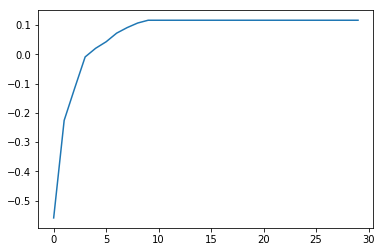

In [84]:
plt.plot([r2_score(y_test, np.std(preds[:i+1], axis=0)) for i in range(30)]);

The above plot suggests that adding more than 9 treest to our model will not enahnce our prediction, so we will go with the default 10 estimators

In [85]:
rmse(model.predict(X_train), y_train), rmse(model.predict(X_test), y_test)

(1419.2372419068688, 2902.066950087074)

In [86]:
print('Training_Score: ', model.score(X_train, y_train))
print('Testing_Score: ', model.score(X_test, y_test))

Training_Score:  0.9094339305046717
Testing_Score:  0.5495888512104106


We can see that the model is overfitting for the training and almost close to a coin toss on the testing data, lets try to pay with the hyperparameters to enance our score

In [87]:
model_2 = RandomForestRegressor(n_estimators=40, min_samples_leaf=4, max_features=0.5, n_jobs=-1)
model_2.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=0.5, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=4, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=40, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [88]:
for i in [2,4,6,10]:
    model_2 = RandomForestRegressor(n_estimators=80, min_samples_leaf=6, max_features=0.7, n_jobs=-1, min_samples_split=i)
    model_2.fit(X_train, y_train)
    
    print('Training_Score: ', i,':', model_2.score(X_train, y_train))
    print('Testing_Score: ', i,':', model_2.score(X_test, y_test))
    print('          ')

Training_Score:  2 : 0.7412691259203201
Testing_Score:  2 : 0.6132777523924167
          
Training_Score:  4 : 0.7430461722608347
Testing_Score:  4 : 0.6211555735124612
          
Training_Score:  6 : 0.7353501306537127
Testing_Score:  6 : 0.6119008893041941
          
Training_Score:  10 : 0.7417102129285902
Testing_Score:  10 : 0.6148821998504674
          


In [89]:
model_2 = RandomForestRegressor(n_estimators=20, min_samples_leaf=6, max_features=0.7, n_jobs=-1,min_samples_split=6)
model_2.fit(X_train, y_train)

print('Training_Score: ', model_2.score(X_train, y_train))
print('Testing_Score: ', model_2.score(X_test, y_test))

Training_Score:  0.7459241122858173
Testing_Score:  0.6218258530374277


----

## Question 1: What are the most important features that affect the host revenue?

In [91]:
# Feature Importance
def feat_imp(m, df):
    return pd.DataFrame({'Features':df.columns, 'Importance':m.feature_importances_}).sort_values('Importance', ascending=False)

In [92]:
feat_imp = feat_imp(model_2, X_train)

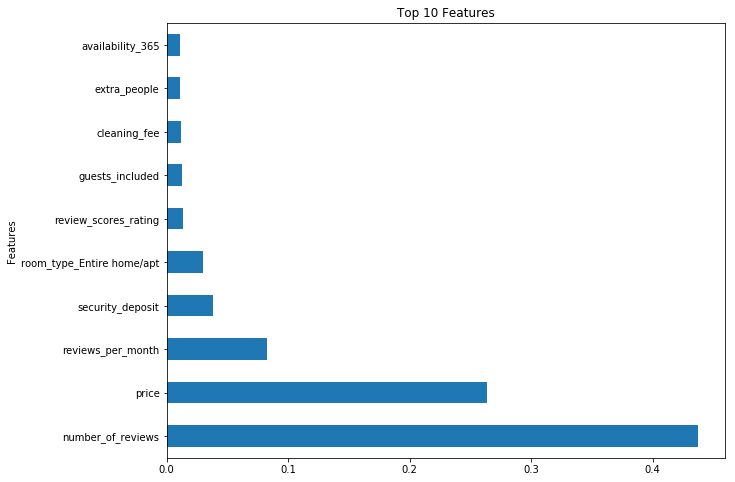

In [93]:
feat_imp[:10].plot('Features', kind='barh',title='Top 10 Features', figsize=(10, 8), legend=False)
plt.show()

Looks like that the number of reviews had the highest effect on the prediction for the revenue, although the model was not very solid with only 62% score, number of reviews makes sense becuase I personally will find it very unlikely to book a listing with little to no reviews, but again the number of reviews was used in the creation of the revenue so the more the number of reviews the higher the revenue and same goes to the price

# Question 2: Is it a winner takes all, in other words are the top listings harvesting more than 1/3 of the total revenue?

In [134]:
top_earning = df.sort_values('Revenue_2015', ascending=False)[:10]

In [135]:
top_earning.Revenue_2015.sum()/df.Revenue_2015.sum()*100

4.263857352713305

These top 10 listings makes less than 5% of the total earnings of the Seattle listings which is awesome as this is not an exclusive business to some listings and the rest taking little to nothing

In [136]:
df.Revenue_2015.describe()

count     3809.000000
mean      2787.113416
std       4389.557014
min          0.000000
25%        192.000000
50%       1184.000000
75%       3604.000000
max      73524.000000
Name: Revenue_2015, dtype: float64

How much of the listings make below the average revenue

In [137]:
df[df.Revenue_2015 < 2787].id.count()/len(df)*100

68.65318981359937

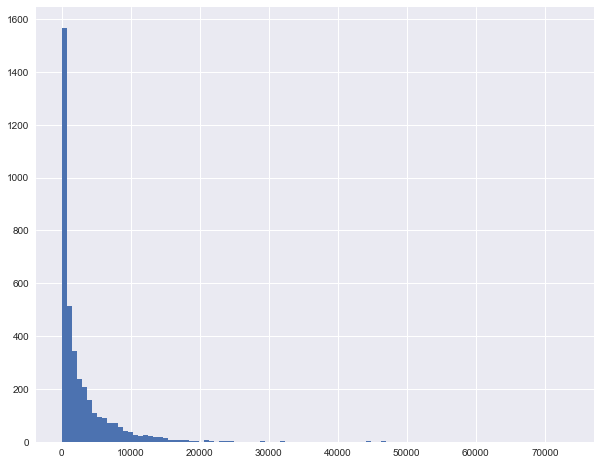

In [138]:
df.Revenue_2015.hist(figsize=(10,8),bins=100)

## Question 3: How much do the hosts make and whom are the top earners? and is it a side business or a full time job?

In [155]:
df_3 = df.merge(df_raw[['id', 'host_name', 'host_id']], on='id')

In [192]:
host_earning = df_3.groupby(['host_id', 'host_name']).agg({'Revenue_2015':'sum', 'id':'count'}).\
                                                          reset_index()

In [193]:
host_earning.sort_values(by='Revenue_2015', ascending=False).head(10)

,host_id,host_name,Revenue_2015,id
1042,8534462,Daniela,278134.0,41
766,5325329,Blair,86795.0,9
1513,16255476,Ken,85476.0,2
728,4962900,Jordan,83900.0,39
30,74305,Darik,66624.0,33
1092,9058822,Andre And Joel,64722.0,4
55,165390,Seth,63720.0,5
1531,16708587,Jill,61200.0,2
130,430709,Sea To Sky Rentals,51963.0,36
1455,14980831,Rebecca,50325.0,9


In [184]:
host_earning[:10].id.sum()

180

The top earner Daniela has 41 listings and the top 10 has 180 listings alone which is clear that these are not in it for a side revenue as usually claimed by AirBnB, these are real businesses using residential homes as hotels

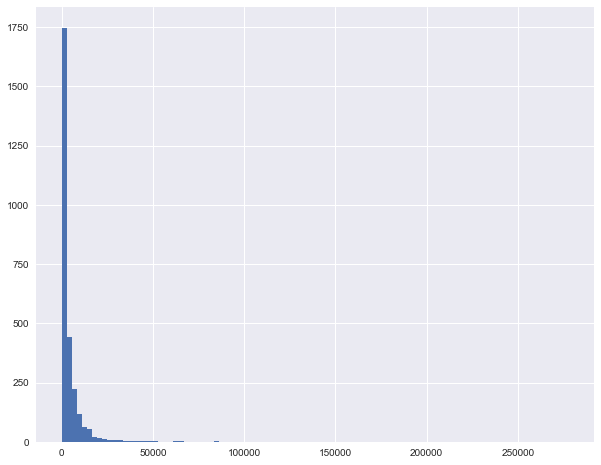

In [181]:
host_earning.Revenue_2015.hist(figsize=(10,8),bins=100)
plt.show()

In [171]:
host_earning.Revenue_2015.describe()

count      2746.000000
mean       3866.028769
std        8644.225371
min           0.000000
25%         220.500000
50%        1470.000000
75%        4400.000000
max      278134.000000
Name: Revenue_2015, dtype: float64

In [187]:
host_earning[host_earning.Revenue_2015 < 3866].id.count()/len(host_earning)*100

71.4857975236708

The average earning per host is 3,866 per year, and as we have seen with the listings, the data is right skewed as 71% of the hosts make less than the average

In [194]:
host_earning.sort_values(by='id', ascending=False).head(10)

,host_id,host_name,Revenue_2015,id
1042,8534462,Daniela,278134.0,41
728,4962900,Jordan,83900.0,39
276,1243056,Andrew,13946.0,37
130,430709,Sea To Sky Rentals,51963.0,36
537,3074414,Melissa,23415.0,34
30,74305,Darik,66624.0,33
2016,26967583,Dario,14155.0,21
955,7354306,Michael,28880.0,18
2508,42537846,Eric,2415.0,16
176,658155,Joe,40213.0,12


In [196]:
host_earning.sort_values(by='id', ascending=False)[:10].\
Revenue_2015.sum()/host_earning.Revenue_2015.sum()*100

5.686119639811739

So these top listers visible above don't make more than 6% of the total revenue we estimated in 2015

## Question 4: How do the top earning listings compare to the worst earning listings in terms of features?

Lets take the top 10 listings

In [107]:
top_earning = df.sort_values('Revenue_2015', ascending=False)[:10]

In [111]:
least_earning = df[df.Revenue_2015 > 0].sort_values('Revenue_2015', ascending=False).tail(10)

In [112]:
top_earning[['id', 'Revenue_2015']]

,id,Revenue_2015
1070,3385421,73524.0
813,723723,49600.0
2,3308979,46800.0
3753,5061411,46400.0
1660,4106041,44480.0
3598,3041619,44250.0
3165,3040278,40796.0
3524,2764126,37500.0
1540,6115704,37050.0
2613,4211081,32256.0


In [113]:
least_earning[['id', 'Revenue_2015']]

,id,Revenue_2015
2537,8597687,47.0
625,9300972,45.0
308,7922063,42.0
1981,5278993,40.0
801,7915432,40.0
1980,7382368,40.0
2483,9632775,39.0
3655,8799588,39.0
2818,9970805,39.0
738,6796336,30.0


### Lets look into these listings features vs those of the worst or least earning listings

In [114]:
top_earning.host_response_time.value_counts()

within an hour        5
within a few hours    4
within a day          1
Name: host_response_time, dtype: int64

In [115]:
least_earning.host_response_time.value_counts()

within a day          5
within a few hours    2
Name: host_response_time, dtype: int64

Most top earners reply within an hours while the worst the least in few hours

In [200]:
top_earning.number_of_reviews.value_counts().sort_index()

4      1
13     1
19     1
20     2
25     1
31     1
49     1
70     1
156    1
Name: number_of_reviews, dtype: int64

In [120]:
least_earning.number_of_reviews.value_counts()

1    10
Name: number_of_reviews, dtype: int64

Majority of the top earners has more than 25 reviews while worst are around 1 review but again this might how we created the revenue variable

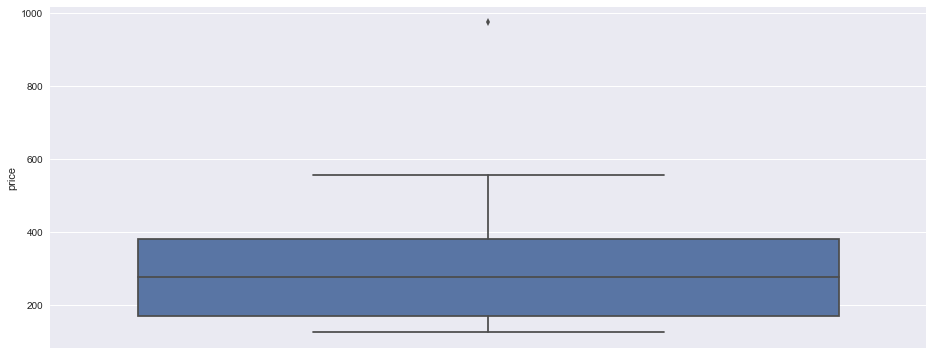

In [126]:
sns.set(rc={'figure.figsize':(15.7,6.27)})
sns.boxplot(y='price', data=top_earning)
plt.show()

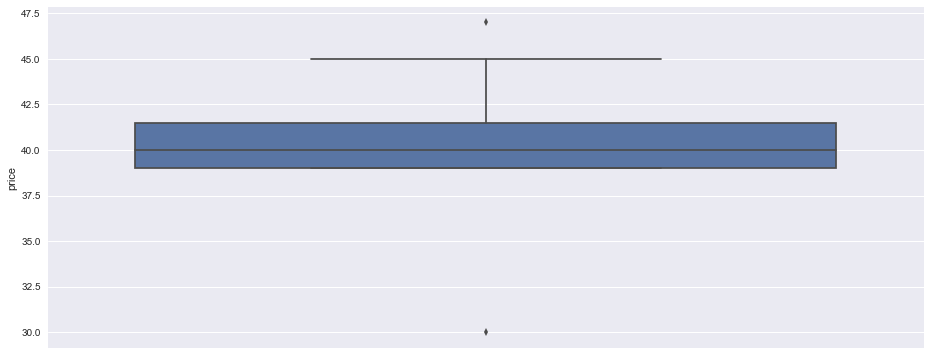

In [127]:
sns.set(rc={'figure.figsize':(15.7,6.27)})
sns.boxplot(y='price', data=least_earning)
plt.show()

Same goes here, the top earners has almost 10x the median of least earner but again it is how revneu is created

In [133]:
top_earning.reviews_per_month.value_counts()

3.68    1
2.45    1
1.30    1
0.43    1
4.83    1
0.80    1
1.15    1
7.96    1
1.25    1
1.75    1
Name: reviews_per_month, dtype: int64

In [132]:
least_earning.reviews_per_month.value_counts()

1.00    3
0.23    1
0.32    1
0.67    1
0.91    1
0.09    1
0.22    1
0.31    1
Name: reviews_per_month, dtype: int64

## Question 5: What are the most popular and most expensive neighborhoods in Seattle?

In [328]:
top_neighbour = df.groupby('neighbourhood_cleansed').price.agg(['mean', 'count'])
top_neighbour_price = top_neighbour.sort_values('mean', ascending =False).reset_index()[:10][['neighbourhood_cleansed', 'mean']]
top_neighbour_listings = top_neighbour.sort_values('count', ascending =False).reset_index()[:10][['neighbourhood_cleansed', 'count']]

In [329]:
# These are the most expensive neighborhoods in Seattle
top_neighbour_price

,neighbourhood_cleansed,mean
0,Southeast Magnolia,231.705882
1,Portage Bay,227.857143
2,Westlake,194.470588
3,West Queen Anne,187.769231
4,Montlake,182.789474
5,Briarcliff,176.571429
6,Sunset Hill,176.055556
7,Industrial District,173.333333
8,Alki,171.619048
9,Windermere,169.900000


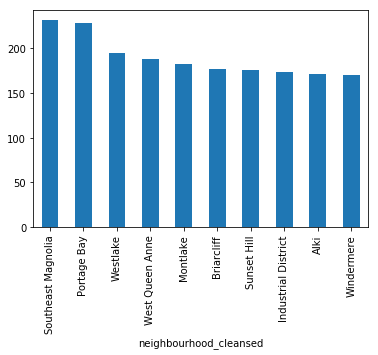

In [330]:
top_neighbour_price.plot(x='neighbourhood_cleansed', kind='bar', legend=False)
plt.show()

In [331]:
top = list(top_neighbour_price.neighbourhood_cleansed)

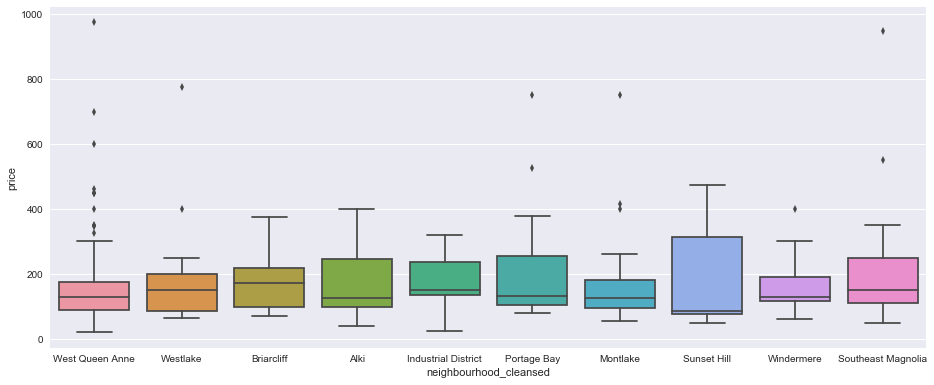

In [332]:
sns.set(rc={'figure.figsize':(15.7,6.27)})
sns.boxplot(x='neighbourhood_cleansed', y='price', data=df[df.neighbourhood_cleansed.isin(top)])
plt.show()

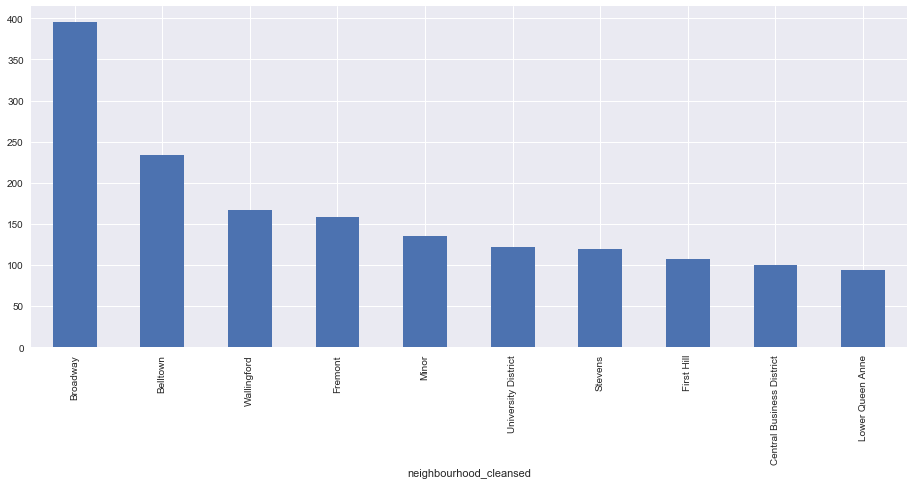

In [333]:
# These are the most popular in Seattle in terms f number of listing
top_neighbour_listings.plot(x='neighbourhood_cleansed', kind='bar', legend=False)
plt.show()

In [198]:
# def text_feaures(df):    
#     # The Amazing Text Variables
#     # The below are a bit challenging because they are free text but definitly we can extract some useful keywords
#     text_var = list(df[['summary', 'space', 'description', \
#                'neighborhood_overview', 'notes', 'transit']].columns)
    
#     # Before any treatment, I'll impute the missing variables in each record
#     # I will impute with 'No Info' because this will help me track the value of these texts if useful
#     df[text_var] = df[text_var].fillna('no info')
    
#     # 1. Create a variable with the number of characters
#     for col in text_var:
#         df[col+'_size'] = df[col].str.len()
    
#     # 2. Create size of distinct words
#     for col in text_var:
#         df[col+'_count'] = df[col].str.lower().str.split().str.len()
        
#     # 3. Add frequency of top 10 words after dropping all the stopwords
#     txt_vect = feature_extraction.text.TfidfVectorizer(max_features=20, stop_words='english')

#     for col in text_var:
#         matrix = txt_vect.fit_transform(df[col])
#         matrix_df = pd.DataFrame(matrix.toarray(), columns=txt_vect.get_feature_names())
    
#         for i in matrix_df:
#             df[col+'_tf_'+str(i)] = matrix_df[i]    
    
#     return df, matrix_df